In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
air_pollution_hammer = pd.read_excel('../data_clean/health_xls/hammersmith-and-fulham-no2-xlsm-63.xls',
                                     sheet_name = 'Hospitalisations Avoided')
air_pollution_hammer.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,1,2016,childhood asthma,0-5,-0.005139,0.076051
1,1,2016,childhood asthma,06-17,0.086805,0.148457
2,1,2016,childhood asthma,18-64,0.294462,0.383378
3,1,2016,childhood asthma,65+,0.096784,0.151127
4,1,2016,childhood asthma,total,0.472910,0.444569


# Data Cleaning for Hammersmith and Fulham

In [3]:
air_pollution_hammer.drop(columns=['Unnamed: 6'], inplace=True)
air_pollution_hammer.head(5)

KeyError: "['Unnamed: 6'] not found in axis"

In [ ]:
air_pollution_hammer.fillna(value='???', limit=1, axis=1)
air_pollution_hammer.head(5)

In [4]:
air_pollution_hammer['Disease'].astype('str')
air_pollution_hammer.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,1,2016,childhood asthma,0-5,-0.005139,0.076051
1,1,2016,childhood asthma,06-17,0.086805,0.148457
2,1,2016,childhood asthma,18-64,0.294462,0.383378
3,1,2016,childhood asthma,65+,0.096784,0.151127
4,1,2016,childhood asthma,total,0.472910,0.444569


In [5]:
fill_gaps = air_pollution_hammer['Year'].fillna('Not Inclusive', inplace = True)
air_pollution_hammer.head(5)

/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_16790/3219669392.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fill_gaps = air_pollution_hammer['Year'].fillna('Not Inclusive', inplace = True)


,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,1,2016,childhood asthma,0-5,-0.005139,0.076051
1,1,2016,childhood asthma,06-17,0.086805,0.148457
2,1,2016,childhood asthma,18-64,0.294462,0.383378
3,1,2016,childhood asthma,65+,0.096784,0.151127
4,1,2016,childhood asthma,total,0.472910,0.444569


In [6]:
air_pollution_hammer = air_pollution_hammer.rename(columns={'95% CL':'Confidence Level'})
air_pollution_hammer.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,1,2016,childhood asthma,0-5,-0.005139,0.076051
1,1,2016,childhood asthma,06-17,0.086805,0.148457
2,1,2016,childhood asthma,18-64,0.294462,0.383378
3,1,2016,childhood asthma,65+,0.096784,0.151127
4,1,2016,childhood asthma,total,0.472910,0.444569


In [7]:
total_hospitalisations_hammer = air_pollution_hammer.rename(columns={'Disease': 'Condition', 'AgeGroup': 'Age'})
total_hospitalisations_hammer.head(5)

,Scenario,Year,Condition,Age,Hospitalisations Avoided,Confidence Level
0,1,2016,childhood asthma,0-5,-0.005139,0.076051
1,1,2016,childhood asthma,06-17,0.086805,0.148457
2,1,2016,childhood asthma,18-64,0.294462,0.383378
3,1,2016,childhood asthma,65+,0.096784,0.151127
4,1,2016,childhood asthma,total,0.472910,0.444569


In [8]:
missing_values = air_pollution_hammer.isnull().sum()
missing_values

Scenario                    0
Year                        0
Disease                     0
AgeGroup                    0
Hospitalisations Avoided    0
Confidence Level            0
dtype: int64

In [9]:
duplicated_values = air_pollution_hammer.duplicated().sum()
duplicated_values 

0

# Filtering and Shaping the Data for Hammersmith and Fulham

In [10]:
filtered_data_2016_ham = air_pollution_hammer[air_pollution_hammer['Year'] == 2016].iloc[:, :]
filtered_data_2016_ham.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,1,2016,childhood asthma,0-5,-0.005139,0.076051
1,1,2016,childhood asthma,06-17,0.086805,0.148457
2,1,2016,childhood asthma,18-64,0.294462,0.383378
3,1,2016,childhood asthma,65+,0.096784,0.151127
4,1,2016,childhood asthma,total,0.472910,0.444569


In [11]:
filtered_data_2023_ham = air_pollution_hammer[air_pollution_hammer['Year'] == 2023].iloc[:, :]
filtered_data_2023_ham.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
112,1,2023,childhood asthma,0-5,0.397160,0.073957
113,1,2023,childhood asthma,06-17,0.563329,0.142707
114,1,2023,childhood asthma,18-64,0.392033,0.362966
115,1,2023,childhood asthma,65+,0.053680,0.146608
116,1,2023,childhood asthma,total,1.406201,0.423170


# Descriptive Statistics Hammersmith and Fulham

In [12]:
air_pollution_hammer.dtypes

Scenario                      int64
Year                          int64
Disease                      object
AgeGroup                     object
Hospitalisations Avoided    float64
Confidence Level            float64
dtype: object

In [13]:
air_pollution_hammer.value_counts('AgeGroup')

AgeGroup
total    420
0-5      315
06-17    315
18-64    315
65+      315
Name: count, dtype: int64

In [14]:
air_pollution_hammer.value_counts('Disease')

Disease
adult asthma        525
childhood asthma    525
lung cancer         525
total               105
Name: count, dtype: int64

In [15]:
air_pollution_hammer.sum()

Scenario                                                                 3360
Year                                                                  3415440
Disease                     childhood asthmachildhood asthmachildhood asth...
AgeGroup                    0-506-1718-6465+total0-506-1718-6465+total0-50...
Hospitalisations Avoided                                          6656.255194
Confidence Level                                                   867.029592
dtype: object

In [16]:
filtered_data_2016_ham['Hospitalisations Avoided'].describe()

count    48.000000
mean      0.604201
std       1.533341
min      -0.208926
25%       0.000000
50%       0.091038
75%       0.484353
max       7.924121
Name: Hospitalisations Avoided, dtype: float64

In [17]:
filtered_data_2023_ham['Hospitalisations Avoided'].describe()

count    48.000000
mean      2.366972
std       4.995543
min      -0.056346
25%       0.006872
50%       0.557896
75%       2.383411
max      29.004867
Name: Hospitalisations Avoided, dtype: float64

In [18]:
filtered_data_2016_ham['Hospitalisations Avoided'].median()

0.0910385

In [19]:
filtered_data_2023_ham['Hospitalisations Avoided'].median()

0.557896

# Exploratory Analysis Hammersmith and Fulham

In [20]:
air_pollution_hammer.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,1,2016,childhood asthma,0-5,-0.005139,0.076051
1,1,2016,childhood asthma,06-17,0.086805,0.148457
2,1,2016,childhood asthma,18-64,0.294462,0.383378
3,1,2016,childhood asthma,65+,0.096784,0.151127
4,1,2016,childhood asthma,total,0.472910,0.444569


In [21]:
info = air_pollution_hammer.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Scenario                  1680 non-null   int64  
 1   Year                      1680 non-null   int64  
 2   Disease                   1680 non-null   object 
 3   AgeGroup                  1680 non-null   object 
 4   Hospitalisations Avoided  1680 non-null   float64
 5   Confidence Level          1680 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 78.9+ KB


In [22]:
air_pollution_hammer.shape

(1680, 6)

In [23]:
air_pollution_hammer.describe()

,Scenario,Year,Hospitalisations Avoided,Confidence Level
count,1680.00000,1680.000000,1680.000000,1680.000000
mean,2.00000,2033.000000,3.962057,0.516089
std,0.81674,10.102512,7.977661,0.717241
min,1.00000,2016.000000,-0.359293,0.000000
25%,1.00000,2024.000000,0.000888,0.049391
50%,2.00000,2033.000000,0.929066,0.146610
75%,3.00000,2042.000000,3.951989,0.566962
max,3.00000,2050.000000,64.791728,2.150169


In [24]:
grouped_category = air_pollution_hammer.groupby(['Disease'])
grouped_category

In [25]:
grouped_category.sum()


,Scenario,Year,AgeGroup,Hospitalisations Avoided,Confidence Level
Disease,,,,,
adult asthma,1050,1067325,0-506-1718-6465+total0-506-1718-6465+total0-50...,836.467464,40.486841
childhood asthma,1050,1067325,0-506-1718-6465+total0-506-1718-6465+total0-50...,1479.808471,116.190444
lung cancer,1050,1067325,0-506-1718-6465+total0-506-1718-6465+total0-50...,2121.227540,496.349544
total,210,213465,totaltotaltotaltotaltotaltotaltotaltotaltotalt...,2218.751719,214.002763


In [26]:
print(len(grouped_category))

4


# Data Cleaning for Tower Hamlets

In [27]:
air_pollution_tower = pd.read_excel('../data_clean/health_xls/tower-hamlets-no2-xlsm-43.xls', 
                                    sheet_name = 'Hospitalisations Avoided')
air_pollution_tower.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,1,2016,childhood asthma,0-5,0.001871,0.081914
1,1,2016,childhood asthma,06-17,0.128593,0.159966
2,1,2016,childhood asthma,18-64,0.448432,0.393522
3,1,2016,childhood asthma,65+,0.026935,0.115791
4,1,2016,childhood asthma,total,0.605831,0.447846


In [28]:
air_pollution_tower.drop(columns=['Scenario'], inplace=True)
air_pollution_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,2016,childhood asthma,0-5,0.001871,0.081914
1,2016,childhood asthma,06-17,0.128593,0.159966
2,2016,childhood asthma,18-64,0.448432,0.393522
3,2016,childhood asthma,65+,0.026935,0.115791
4,2016,childhood asthma,total,0.605831,0.447846


In [29]:
air_pollution_tower.fillna(value='???', limit=1, axis=1)
air_pollution_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,2016,childhood asthma,0-5,0.001871,0.081914
1,2016,childhood asthma,06-17,0.128593,0.159966
2,2016,childhood asthma,18-64,0.448432,0.393522
3,2016,childhood asthma,65+,0.026935,0.115791
4,2016,childhood asthma,total,0.605831,0.447846


In [30]:
air_pollution_tower['Disease'].astype('str')
air_pollution_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,2016,childhood asthma,0-5,0.001871,0.081914
1,2016,childhood asthma,06-17,0.128593,0.159966
2,2016,childhood asthma,18-64,0.448432,0.393522
3,2016,childhood asthma,65+,0.026935,0.115791
4,2016,childhood asthma,total,0.605831,0.447846


In [31]:
fill_gaps = air_pollution_tower['Year'].fillna('Not Inclusive', inplace = True)
air_pollution_tower.head(5)

/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_16790/3054388182.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fill_gaps = air_pollution_tower['Year'].fillna('Not Inclusive', inplace = True)


,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,2016,childhood asthma,0-5,0.001871,0.081914
1,2016,childhood asthma,06-17,0.128593,0.159966
2,2016,childhood asthma,18-64,0.448432,0.393522
3,2016,childhood asthma,65+,0.026935,0.115791
4,2016,childhood asthma,total,0.605831,0.447846


In [32]:
air_pollution_tower = air_pollution_tower.rename(columns={'95% CL':'Confidence Level'})
air_pollution_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,0.001871,0.081914
1,2016,childhood asthma,06-17,0.128593,0.159966
2,2016,childhood asthma,18-64,0.448432,0.393522
3,2016,childhood asthma,65+,0.026935,0.115791
4,2016,childhood asthma,total,0.605831,0.447846


In [33]:
total_hospitalisations_tower = air_pollution_tower.rename(columns={'Disease': 'Condition', 'AgeGroup': 'Age'})
total_hospitalisations_tower.head(5)

,Year,Condition,Age,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,0.001871,0.081914
1,2016,childhood asthma,06-17,0.128593,0.159966
2,2016,childhood asthma,18-64,0.448432,0.393522
3,2016,childhood asthma,65+,0.026935,0.115791
4,2016,childhood asthma,total,0.605831,0.447846


In [34]:
missing_values = air_pollution_tower.isnull().sum()
missing_values

Year                        0
Disease                     0
AgeGroup                    0
Hospitalisations Avoided    0
Confidence Level            0
dtype: int64

In [35]:
duplicated_values = air_pollution_tower.duplicated().sum()
duplicated_values 

217

In [36]:
(air_pollution_tower.drop_duplicates())

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,0.001871,0.081914
1,2016,childhood asthma,06-17,0.128593,0.159966
2,2016,childhood asthma,18-64,0.448432,0.393522
3,2016,childhood asthma,65+,0.026935,0.115791
4,2016,childhood asthma,total,0.605831,0.447846
...,...,...,...,...,...
1675,2050,lung cancer,06-17,-0.007621,0.018315
1676,2050,lung cancer,18-64,4.976468,0.848647
1677,2050,lung cancer,65+,10.574992,1.397158
1678,2050,lung cancer,total,15.543840,1.634804


# Filtering and Shaping the Data for Tower Hamlets

In [37]:
filtered_data_2016_tow = air_pollution_tower[air_pollution_tower['Year'] == 2016].iloc[:, :]
filtered_data_2016_tow.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,0.001871,0.081914
1,2016,childhood asthma,06-17,0.128593,0.159966
2,2016,childhood asthma,18-64,0.448432,0.393522
3,2016,childhood asthma,65+,0.026935,0.115791
4,2016,childhood asthma,total,0.605831,0.447846


In [38]:
filtered_data_2023_tow = air_pollution_tower[air_pollution_tower['Year'] == 2023].iloc[:, :]
filtered_data_2016_tow.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,0.001871,0.081914
1,2016,childhood asthma,06-17,0.128593,0.159966
2,2016,childhood asthma,18-64,0.448432,0.393522
3,2016,childhood asthma,65+,0.026935,0.115791
4,2016,childhood asthma,total,0.605831,0.447846


# Descriptive Statistics Tower Hamlets

In [39]:
air_pollution_tower.dtypes

Year                          int64
Disease                      object
AgeGroup                     object
Hospitalisations Avoided    float64
Confidence Level            float64
dtype: object

In [40]:
air_pollution_tower.value_counts('AgeGroup')

AgeGroup
total    420
0-5      315
06-17    315
18-64    315
65+      315
Name: count, dtype: int64

In [41]:
air_pollution_tower.value_counts('Disease')

Disease
adult asthma        525
childhood asthma    525
lung cancer         525
total               105
Name: count, dtype: int64

In [42]:
air_pollution_tower.sum()

Year                                                                  3415440
Disease                     childhood asthmachildhood asthmachildhood asth...
AgeGroup                    0-506-1718-6465+total0-506-1718-6465+total0-50...
Hospitalisations Avoided                                          5773.717214
Confidence Level                                                   703.105574
dtype: object

In [43]:
filtered_data_2016_tow['Hospitalisations Avoided'].describe()

count    48.000000
mean      0.457826
std       1.066516
min      -0.258759
25%       0.000000
50%       0.039968
75%       0.516243
max       5.864837
Name: Hospitalisations Avoided, dtype: float64

In [44]:
filtered_data_2023_tow['Hospitalisations Avoided'].describe()

count    48.000000
mean      1.822664
std       3.867050
min      -0.145409
25%       0.001856
50%       0.474135
75%       1.595604
max      23.035246
Name: Hospitalisations Avoided, dtype: float64

In [45]:
filtered_data_2016_tow['Hospitalisations Avoided'].median()

0.0399675

In [46]:
filtered_data_2023_tow['Hospitalisations Avoided'].median()

0.4741345

# Exploratory Analysis Tower Hamlets 

In [47]:
air_pollution_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,0.001871,0.081914
1,2016,childhood asthma,06-17,0.128593,0.159966
2,2016,childhood asthma,18-64,0.448432,0.393522
3,2016,childhood asthma,65+,0.026935,0.115791
4,2016,childhood asthma,total,0.605831,0.447846


In [48]:
info = air_pollution_tower.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      1680 non-null   int64  
 1   Disease                   1680 non-null   object 
 2   AgeGroup                  1680 non-null   object 
 3   Hospitalisations Avoided  1680 non-null   float64
 4   Confidence Level          1680 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 65.8+ KB


In [49]:
air_pollution_tower.shape

(1680, 5)

In [50]:
air_pollution_tower.describe()

,Year,Hospitalisations Avoided,Confidence Level
count,1680.000000,1.680000e+03,1680.000000
mean,2033.000000,3.436736e+00,0.418515
std,10.102512,7.327952e+00,0.549777
min,2016.000000,-2.587590e-01,0.000000
25%,2024.000000,7.500000e-07,0.050445
50%,2033.000000,7.374260e-01,0.133578
75%,2042.000000,3.552594e+00,0.543688
max,2050.000000,6.294151e+01,1.702029


# Combined Data Sorting, Merging, Concat

In [51]:
all_results_hammer = air_pollution_tower.sort_values(by=['Disease','AgeGroup','Hospitalisations Avoided'],ascending=True,inplace=False)
all_results_hammer.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
5,2016,adult asthma,0-5,0.0,0.0
21,2017,adult asthma,0-5,0.0,0.0
37,2018,adult asthma,0-5,0.0,0.0
53,2019,adult asthma,0-5,0.0,0.0
69,2020,adult asthma,0-5,0.0,0.0


In [52]:
all_results_tower = air_pollution_tower.sort_values(by=['Disease','AgeGroup','Hospitalisations Avoided'],ascending=True,inplace=False)
all_results_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
5,2016,adult asthma,0-5,0.0,0.0
21,2017,adult asthma,0-5,0.0,0.0
37,2018,adult asthma,0-5,0.0,0.0
53,2019,adult asthma,0-5,0.0,0.0
69,2020,adult asthma,0-5,0.0,0.0


In [53]:
combined_results = pd.concat([air_pollution_hammer, air_pollution_tower], axis=1).reindex(air_pollution_hammer.index)
combined_results.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,1,2016,childhood asthma,0-5,-0.005139,0.076051,2016,childhood asthma,0-5,0.001871,0.081914
1,1,2016,childhood asthma,06-17,0.086805,0.148457,2016,childhood asthma,06-17,0.128593,0.159966
2,1,2016,childhood asthma,18-64,0.294462,0.383378,2016,childhood asthma,18-64,0.448432,0.393522
3,1,2016,childhood asthma,65+,0.096784,0.151127,2016,childhood asthma,65+,0.026935,0.115791
4,1,2016,childhood asthma,total,0.472910,0.444569,2016,childhood asthma,total,0.605831,0.447846


In [54]:
combined_total_results = pd.concat([total_hospitalisations_hammer, total_hospitalisations_tower], axis=1).reindex(total_hospitalisations_hammer.index)
combined_total_results.head(5)

,Scenario,Year,Condition,Age,Hospitalisations Avoided,Confidence Level,Year,Condition,Age,Hospitalisations Avoided,Confidence Level
0,1,2016,childhood asthma,0-5,-0.005139,0.076051,2016,childhood asthma,0-5,0.001871,0.081914
1,1,2016,childhood asthma,06-17,0.086805,0.148457,2016,childhood asthma,06-17,0.128593,0.159966
2,1,2016,childhood asthma,18-64,0.294462,0.383378,2016,childhood asthma,18-64,0.448432,0.393522
3,1,2016,childhood asthma,65+,0.096784,0.151127,2016,childhood asthma,65+,0.026935,0.115791
4,1,2016,childhood asthma,total,0.472910,0.444569,2016,childhood asthma,total,0.605831,0.447846


In [55]:
sliced_list_ham = (total_hospitalisations_hammer).iloc[0:4] 
sliced_list_ham

,Scenario,Year,Condition,Age,Hospitalisations Avoided,Confidence Level
0,1,2016,childhood asthma,0-5,-0.005139,0.076051
1,1,2016,childhood asthma,06-17,0.086805,0.148457
2,1,2016,childhood asthma,18-64,0.294462,0.383378
3,1,2016,childhood asthma,65+,0.096784,0.151127


In [56]:
sliced_list_tow = (total_hospitalisations_tower).iloc[0:4] 
sliced_list_tow

,Year,Condition,Age,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,0.001871,0.081914
1,2016,childhood asthma,06-17,0.128593,0.159966
2,2016,childhood asthma,18-64,0.448432,0.393522
3,2016,childhood asthma,65+,0.026935,0.115791


# Total Conditons in Hammersmith and Fulham

In [57]:
total_conditions_2016_ham = pd.DataFrame({'Conditions': ['childhood asthma','adult asthma','lung cancer'],
                                      'Total Hospitalisations Avoided Hammersmith 2016':[0.444569,0.171604,1.788922]})
total_conditions_2016_ham

,Conditions,Total Hospitalisations Avoided Hammersmith 2016
0,childhood asthma,0.444569
1,adult asthma,0.171604
2,lung cancer,1.788922


In [58]:
total_conditions_2023_ham = pd.DataFrame({'Conditions': ['childhood asthma','adult asthma','lung cancer'],
                                      'Total Hospitalisations Avoided Hammersmith 2023':[0.42317,0.16485,1.89977]})
total_conditions_2023_ham

,Conditions,Total Hospitalisations Avoided Hammersmith 2023
0,childhood asthma,0.42317
1,adult asthma,0.16485
2,lung cancer,1.89977


# Total Conditons in Tower Hamlets¶

In [59]:
total_conditions_2016_tow = pd.DataFrame({'Conditions': ['childhood asthma','adult asthma','lung cancer'],
                                      'Total Hospitalisations Avoided Tower Ham 2016':[0.447846,0.155088,1.421717]})
total_conditions_2016_tow

,Conditions,Total Hospitalisations Avoided Tower Ham 2016
0,childhood asthma,0.447846
1,adult asthma,0.155088
2,lung cancer,1.421717


In [60]:
total_conditions_2023_tow = pd.DataFrame({'Conditions': ['childhood asthma','adult asthma','lung cancer'],
                                      'Total Hospitalisations Avoided Tower Ham 2023':[0.418027,0.147502,1.472277]})
total_conditions_2023_tow

,Conditions,Total Hospitalisations Avoided Tower Ham 2023
0,childhood asthma,0.418027
1,adult asthma,0.147502
2,lung cancer,1.472277


# Hospitalisations Avoided by Age Group for Hammersmith and Fulham

In [61]:
age_group_2016_ham = pd.DataFrame({'AgeGroup': ['0-5','06-17','18-64','65+'],
                    'HospitalisationsAvoided':[0.076051, 0.171923, 1.488367, 1.753668]})
age_group_2016_ham

,AgeGroup,HospitalisationsAvoided
0,0-5,0.076051
1,06-17,0.171923
2,18-64,1.488367
3,65+,1.753668


In [62]:
age_group_2016_ham.value_counts(['AgeGroup', 'HospitalisationsAvoided'])

AgeGroup  HospitalisationsAvoided
0-5       0.076051                   1
06-17     0.171923                   1
18-64     1.488367                   1
65+       1.753668                   1
Name: count, dtype: int64

In [63]:
age_group_2016_ham.AgeGroup.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

AgeGroup
0-5      25.0%
06-17    25.0%
18-64    25.0%
65+      25.0%
Name: proportion, dtype: object

In [64]:
age_group_2016_ham.HospitalisationsAvoided.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

HospitalisationsAvoided
0.076051    25.0%
0.171923    25.0%
1.488367    25.0%
1.753668    25.0%
Name: proportion, dtype: object

In [65]:
age_group_2023_ham = pd.DataFrame({'AgeGroup': ['0-5','06-17','18-64','65+'],
                    'HospitalisationsAvoided':[0.073957,0.162289,1.543517,1.825265]})
age_group_2023_ham

,AgeGroup,HospitalisationsAvoided
0,0-5,0.073957
1,06-17,0.162289
2,18-64,1.543517
3,65+,1.825265


In [66]:
age_group_2023_ham.value_counts(['AgeGroup', 'HospitalisationsAvoided'])

AgeGroup  HospitalisationsAvoided
0-5       0.073957                   1
06-17     0.162289                   1
18-64     1.543517                   1
65+       1.825265                   1
Name: count, dtype: int64

In [67]:
age_group_2023_ham.AgeGroup.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

AgeGroup
0-5      25.0%
06-17    25.0%
18-64    25.0%
65+      25.0%
Name: proportion, dtype: object

In [68]:
age_group_2023_ham.HospitalisationsAvoided.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

HospitalisationsAvoided
0.073957    25.0%
0.162289    25.0%
1.543517    25.0%
1.825265    25.0%
Name: proportion, dtype: object

# Hospitalisations Avoided by Age Group for Tower Hamlets

In [69]:
age_group_2016_tow = pd.DataFrame({'AgeGroup': ['0-5','06-17','18-64','65+'],
                    'HospitalisationsAvoided':[0.001871,0.171025,1.371843,1.334176]})
age_group_2016_tow

,AgeGroup,HospitalisationsAvoided
0,0-5,0.001871
1,06-17,0.171025
2,18-64,1.371843
3,65+,1.334176


In [70]:
age_group_2016_tow.value_counts(['AgeGroup', 'HospitalisationsAvoided'])

AgeGroup  HospitalisationsAvoided
0-5       0.001871                   1
06-17     0.171025                   1
18-64     1.371843                   1
65+       1.334176                   1
Name: count, dtype: int64

In [71]:
age_group_2016_tow.AgeGroup.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

AgeGroup
0-5      25.0%
06-17    25.0%
18-64    25.0%
65+      25.0%
Name: proportion, dtype: object

In [72]:
age_group_2016_tow.HospitalisationsAvoided.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

HospitalisationsAvoided
0.001871    25.0%
0.171025    25.0%
1.371843    25.0%
1.334176    25.0%
Name: proportion, dtype: object

In [73]:
age_group_2016_tow.HospitalisationsAvoided.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

HospitalisationsAvoided
0.001871    25.0%
0.171025    25.0%
1.371843    25.0%
1.334176    25.0%
Name: proportion, dtype: object

In [74]:
age_group_2023_tow = pd.DataFrame({'AgeGroup': ['0-5','06-17','18-64','65+'],
                    'HospitalisationsAvoided':[0.079479,0.17325,1.381785,1.354161]})
age_group_2023_tow

,AgeGroup,HospitalisationsAvoided
0,0-5,0.079479
1,06-17,0.173250
2,18-64,1.381785
3,65+,1.354161


In [75]:
age_group_2023_tow.value_counts(['AgeGroup', 'HospitalisationsAvoided'])

AgeGroup  HospitalisationsAvoided
0-5       0.079479                   1
06-17     0.173250                   1
18-64     1.381785                   1
65+       1.354161                   1
Name: count, dtype: int64

In [76]:
age_group_2023_tow.AgeGroup.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

AgeGroup
0-5      25.0%
06-17    25.0%
18-64    25.0%
65+      25.0%
Name: proportion, dtype: object

In [77]:
age_group_2023_tow.HospitalisationsAvoided.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

HospitalisationsAvoided
0.079479    25.0%
0.173250    25.0%
1.381785    25.0%
1.354161    25.0%
Name: proportion, dtype: object

# NHS Costs Avoided in Hammersmith and Fulham

In [78]:
costs_avoided_2016_ham = pd.DataFrame({'NHS Costs Avoided in 2016 Hammersmith':['childhood asthma', 'adult asthma', 'dementia', 'diabetes','low birth weight','lung cancer'],'£pounds':[1458.81, 914.26, 3269.29, 11503.77, 0.00, 596.33]})
costs_avoided_2016_ham

,NHS Costs Avoided in 2016 Hammersmith,£pounds
0,childhood asthma,1458.81
1,adult asthma,914.26
2,dementia,3269.29
3,diabetes,11503.77
4,low birth weight,0.00
5,lung cancer,596.33


In [79]:
costs_avoided_2016_ham.sort_values(by=['£pounds'],ascending=True,inplace=False)

,NHS Costs Avoided in 2016 Hammersmith,£pounds
4,low birth weight,0.00
5,lung cancer,596.33
1,adult asthma,914.26
0,childhood asthma,1458.81
2,dementia,3269.29
3,diabetes,11503.77


In [80]:
costs_avoided_2023_ham = pd.DataFrame({'NHS Costs Avoided in 2023 Hammersmith':['childhood asthma', 'adult asthma', 'dementia', 'diabetes','low birth weight','lung cancer'],'£pounds':[1387.98, 878.12, 3072.12, 11087.60, 0.00, 633.25]})
costs_avoided_2023_ham

,NHS Costs Avoided in 2023 Hammersmith,£pounds
0,childhood asthma,1387.98
1,adult asthma,878.12
2,dementia,3072.12
3,diabetes,11087.60
4,low birth weight,0.00
5,lung cancer,633.25


In [81]:
costs_avoided_2023_ham.sort_values(by=['£pounds'],ascending=True,inplace=False)

,NHS Costs Avoided in 2023 Hammersmith,£pounds
4,low birth weight,0.00
5,lung cancer,633.25
1,adult asthma,878.12
0,childhood asthma,1387.98
2,dementia,3072.12
3,diabetes,11087.60


# NHS Costs Avoided in Tower Hamlets

In [82]:
costs_avoided_2016_tow = pd.DataFrame({'NHS Costs Avoided in 2016 Tower Ham':['childhood asthma', 'adult asthma', 'dementia', 'diabetes','low birth weight','lung cancer'],'£pounds':[1472.89, 828.68, 2540.35, 10103.83, 0.00, 473.95]})
costs_avoided_2016_tow

,NHS Costs Avoided in 2016 Tower Ham,£pounds
0,childhood asthma,1472.89
1,adult asthma,828.68
2,dementia,2540.35
3,diabetes,10103.83
4,low birth weight,0.00
5,lung cancer,473.95


In [83]:
costs_avoided_2016_tow.sort_values(by=['£pounds'],ascending=True,inplace=False)

,NHS Costs Avoided in 2016 Tower Ham,£pounds
4,low birth weight,0.00
5,lung cancer,473.95
1,adult asthma,828.68
0,childhood asthma,1472.89
2,dementia,2540.35
3,diabetes,10103.83


In [84]:
costs_avoided_2023_tow = pd.DataFrame({'NHS Costs Avoided in 2023 Tower Ham':['childhood asthma', 'adult asthma', 'dementia', 'diabetes','low birth weight','lung cancer'],'£pounds':[1374.11, 788.06, 2232.62, 9580.45, 0.00, 490.79]})
costs_avoided_2023_tow

,NHS Costs Avoided in 2023 Tower Ham,£pounds
0,childhood asthma,1374.11
1,adult asthma,788.06
2,dementia,2232.62
3,diabetes,9580.45
4,low birth weight,0.00
5,lung cancer,490.79


In [85]:
costs_avoided_2023_tow.sort_values(by=['£pounds'],ascending=True,inplace=False)

,NHS Costs Avoided in 2023 Tower Ham,£pounds
4,low birth weight,0.00
5,lung cancer,490.79
1,adult asthma,788.06
0,childhood asthma,1374.11
2,dementia,2232.62
3,diabetes,9580.45


# Data Visualisations 

In [86]:
# 95CL used due to negatives values some areas have been rounded to X2DP. 

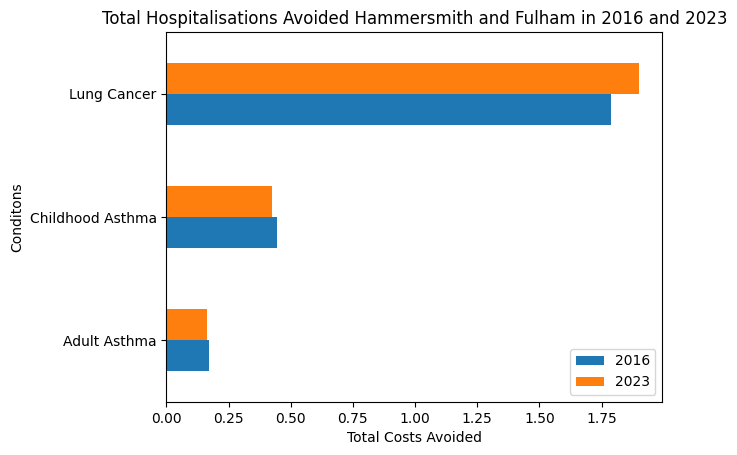

In [87]:
import matplotlib.pyplot as plt

# Total Hospitalisations Avoided in Hammersmith and Fulham in 2016 and 2023

Total_Conditions_2016 = [0.171604, 0.444569, 1.788922]
Total_Conditions_2023 = [0.16485, 0.42317, 1.89977]
index = ['Adult Asthma','Childhood Asthma', 'Lung Cancer']
df = pd.DataFrame({'2016': Total_Conditions_2016,'2023': Total_Conditions_2023}, index=index)
ax = df.plot.barh()

plt.title('Total Hospitalisations Avoided Hammersmith and Fulham in 2016 and 2023')
plt.ylabel('Conditons')
plt.xlabel('Total Costs Avoided')
plt.legend()

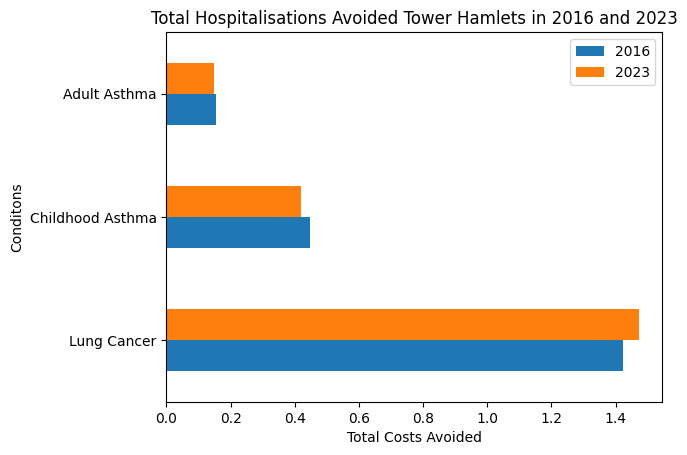

In [88]:
import matplotlib.pyplot as plt

# Total Hospitalisations Avoided in Tower Hamlets in 2016 and 2023

Total_Conditions_2016 = [1.421717, 0.447846, 0.155088]
Total_Conditions_2023 = [1.472277, 0.418027, 0.147502]
index = ['Lung Cancer','Childhood Asthma', 'Adult Asthma']
df = pd.DataFrame({'2016': Total_Conditions_2016,'2023': Total_Conditions_2023}, index=index)
ax = df.plot.barh()

plt.title('Total Hospitalisations Avoided Tower Hamlets in 2016 and 2023')
plt.ylabel('Conditons')
plt.xlabel('Total Costs Avoided')
plt.legend()

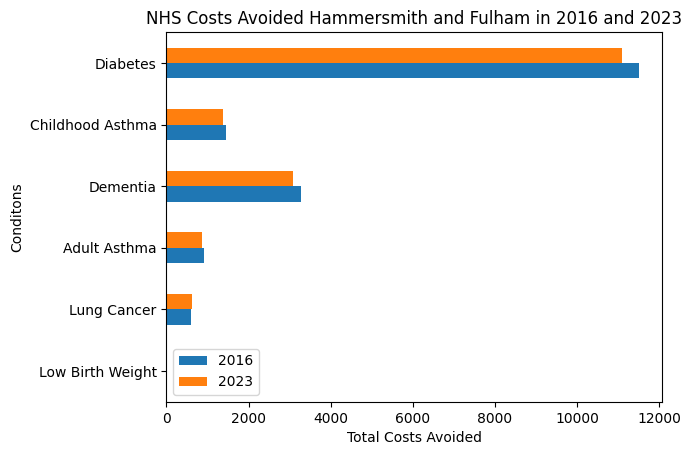

In [89]:
import matplotlib.pyplot as plt

# NHS Costs Avoided for years 2016 and 2023 against Conditions/Diseases in Hammersmith and Fulham

Costs_Avoided_2016 = [0.00,596.33, 914.26, 3269.29, 1458.81, 11503.77]
Costs_Avoided_2023 = [0.00, 633.25, 878.12, 3072.12, 1387.98, 11087.60]
index = ['Low Birth Weight','Lung Cancer','Adult Asthma','Dementia','Childhood Asthma', 'Diabetes' ]
df = pd.DataFrame({'2016': Costs_Avoided_2016,'2023': Costs_Avoided_2023}, index=index)
ax = df.plot.barh()

plt.title('NHS Costs Avoided Hammersmith and Fulham in 2016 and 2023')
plt.ylabel('Conditons')
plt.xlabel('Total Costs Avoided')
plt.legend()

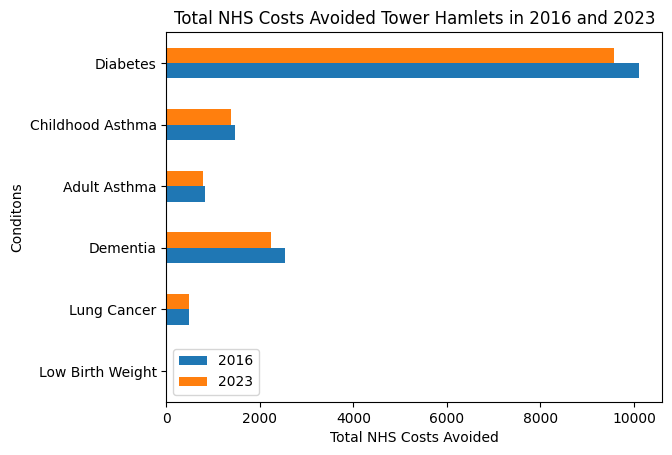

In [90]:
import matplotlib.pyplot as plt

# NHS Costs Avoided for years 2016 and 2023 avoided against Conditions/Diseases in Tower Hamlets

NHS_Costs_Avoided_2016 = [0.00, 473.95, 2540.35,828.68, 1472.89, 10103.83]
NHS_Costs_Avoided_2023 = [0.00, 490.79, 2232.62, 788.06,1374.11, 9580.45]
index = ['Low Birth Weight','Lung Cancer', 'Dementia','Adult Asthma', 'Childhood Asthma', 'Diabetes' ]
df = pd.DataFrame({'2016': NHS_Costs_Avoided_2016,'2023': NHS_Costs_Avoided_2023}, index=index)
ax = df.plot.barh()

plt.title('Total NHS Costs Avoided Tower Hamlets in 2016 and 2023')
plt.ylabel('Conditons')
plt.xlabel('Total NHS Costs Avoided')
plt.legend()

Text(0.5, 1.0, 'Hospitalisations Avoided by AgeGroup Hammersmith and Fulham in 2016')

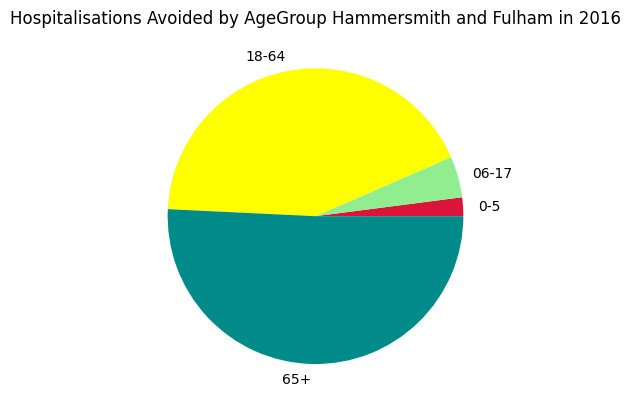

In [91]:
import matplotlib.pyplot as plt

# NHS Costs avoided against AgeGroups in Hammersmith and Fulham 2016
# figures were converted from decimal to % then rounded to X1DP

labels = '0-5', '06-17', '18-64', '65+'
sizes = [7.4, 16.23, 154.4, 183.5]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=(['crimson', 'lightgreen', 'yellow', 'darkcyan']))
plt.title('Hospitalisations Avoided by AgeGroup Hammersmith and Fulham in 2016')

Text(0.5, 1.0, 'Hospitalisations Avoided by AgeGroup Hammersmith and Fulham in 2023')

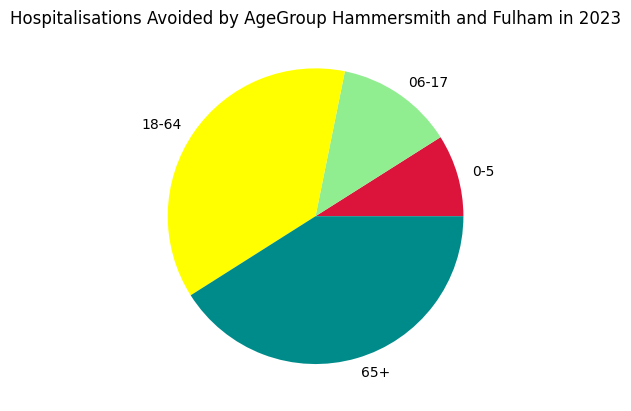

In [92]:
import matplotlib.pyplot as plt

# NHS Costs avoided against AgeGroups in Hammersmith and Fulham 2023
# figures were converted from decimal to % then rounded to X1DP

labels = '0-5', '06-17', '18-64', '65+'
sizes = [39.7, 56.8, 164.4, 181.4]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=(['crimson', 'lightgreen', 'yellow', 'darkcyan']))
plt.title('Hospitalisations Avoided by AgeGroup Hammersmith and Fulham in 2023')

Text(0.5, 1.0, 'Hospitalisations Avoided by AgeGroup Tower Hamlets in 2016')

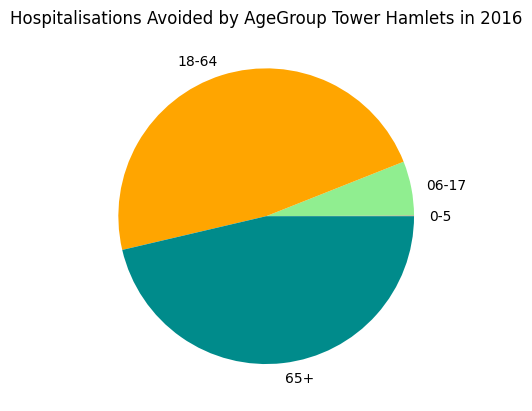

In [93]:
import matplotlib.pyplot as plt

# NHS Costs avoided against AgeGroups in Tower Hamlets 2016
# figures were converted from decimal to % then rounded to X1DP

labels = '0-5', '06-17', '18-64', '65+'
sizes = [0.2, 17.1, 137.2, 133.4]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=(['crimson', 'lightgreen', 'orange', 'darkcyan']))
plt.title('Hospitalisations Avoided by AgeGroup Tower Hamlets in 2016')

Text(0.5, 1.0, 'Hospitalisations Avoided by AgeGroup Tower Hamlets in 2023')

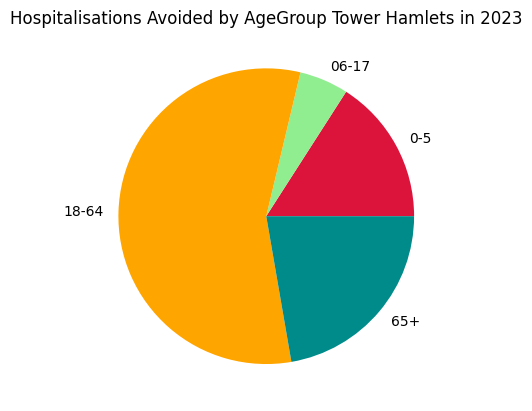

In [94]:
import matplotlib.pyplot as plt

# NHS Costs avoided against AgeGroups in Tower Hamlets 2023
# figures were converted from decimal to % then rounded to X1DP

labels = '0-5', '06-17', '18-64', '65+'
sizes = [38.3, 12.9, 135.8, 53.6]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=(['crimson', 'lightgreen', 'orange', 'darkcyan']))
plt.title('Hospitalisations Avoided by AgeGroup Tower Hamlets in 2023')

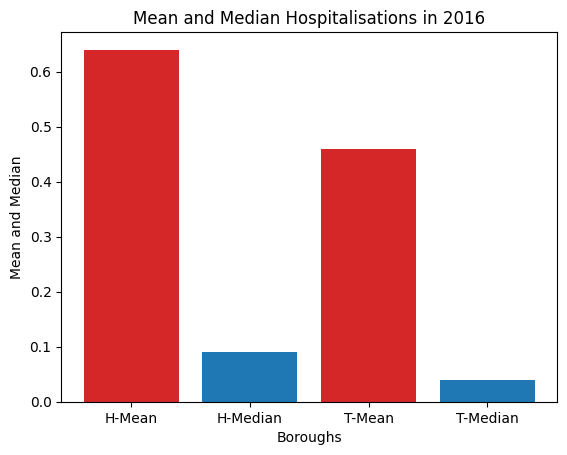

In [95]:
import matplotlib.pyplot as plt

# Taken from the filtered data Mean and Median no. Hospitalisations Avoided in 2016 for both boroughs has been rounded to X2DP

fig, ax = plt.subplots()

boroughs = ['H-Mean', 'H-Median', 'T-Mean', 'T-Median']
counts =   [0.64, 0.09, 0.46, 0.04]
bar_labels = ['Ham 16', 'Ham 16','Tow 16', 'Tow 16']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:blue']

ax.bar(boroughs, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Mean and Median')
ax.set_xlabel('Boroughs')
ax.set_title('Mean and Median Hospitalisations in 2016')

plt.show()

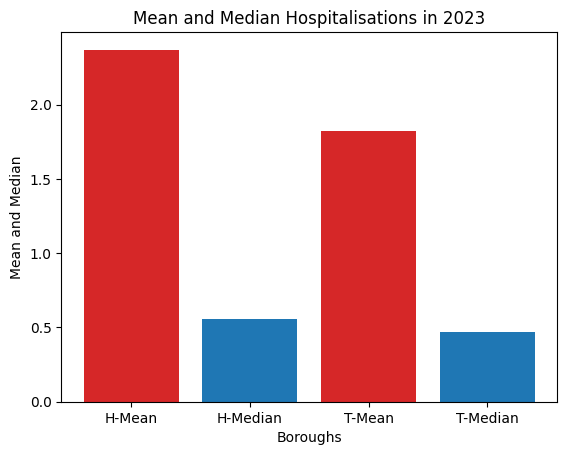

In [96]:
import matplotlib.pyplot as plt

# Taken from the filtered data Mean and Median no. Hospitalisations Avoided in 2023 has been rounded to X2DP

fig, ax = plt.subplots()

boroughs = ['H-Mean', 'H-Median', 'T-Mean', 'T-Median']
counts = [2.37, 0.56, 1.82, 0.47]
bar_labels = ['Ham 23', 'Ham 23','Tow 23', 'Tow 23']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:blue']

ax.bar(boroughs, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Mean and Median')
ax.set_xlabel('Boroughs')
ax.set_title('Mean and Median Hospitalisations in 2023')

plt.show()

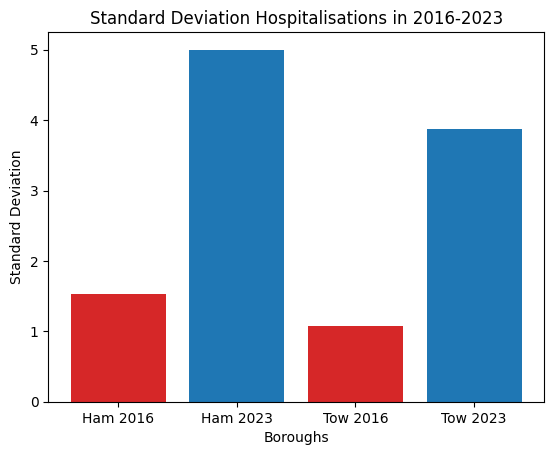

In [97]:
import matplotlib.pyplot as plt

# Taken from the filtered data Standard Deviation no. Hospitalisations Avoided in 2016 has been rounded to X2DP

fig, ax = plt.subplots()

boroughs = ['Ham 2016', 'Ham 2023', 'Tow 2016', 'Tow 2023']
counts = [1.53, 5.00, 1.07, 3.87]
bar_labels = ['Ham 16', 'Ham 23','Tow 16', 'Tow 23']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:blue']

ax.bar(boroughs, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Standard Deviation')
ax.set_xlabel('Boroughs')
ax.set_title('Standard Deviation Hospitalisations in 2016-2023')

plt.show()